In [12]:
import act_car

In [1]:
import os
import healpy as hp
import numpy as np
from astropy.io import fits

# WISE SAMPLE

In [9]:
import galaxy_map_read as gmr

sample = "midz"
pathmap, pathmask,pathloss,pathweight1,pathweight2 = gmr.read_path(sample)

In [17]:
hdul_loss = fits.open(pathloss)
hdul_loss.info()
data1 = hdul_loss[1].data
print(data1.columns)

Filename: /mnt/d/data_large/unwise_sz/unWISE/midz/loss_healpix/neo8-areamask-midz-2048.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  xtension      1 BinTableHDU     18   49152R x 1C   [1024D]   
ColDefs(
    name = 'T'; format = '1024D'
)


In [18]:
column_data = data1.field(0)  # Access the first column

# Concatenate all rows into a single array
healpix_map = np.concatenate(column_data)

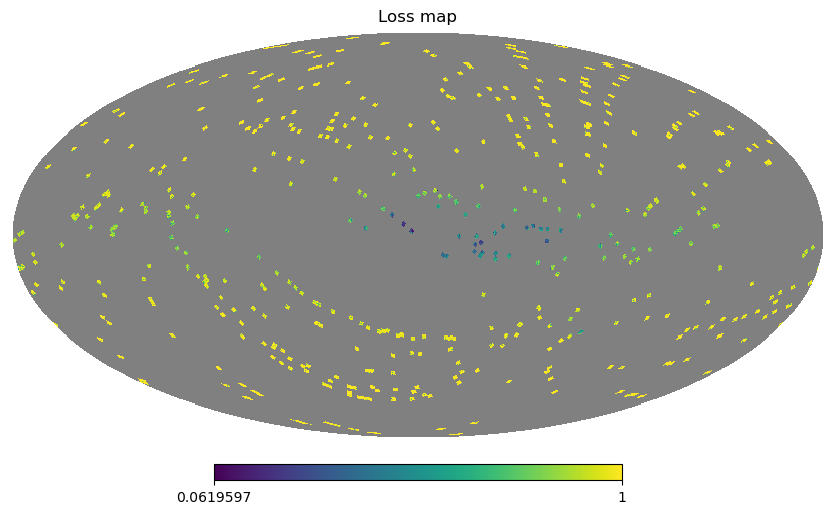

In [19]:
hp.mollview(healpix_map, title="Loss map")

In [ ]:
print(data1[:10])

[([nan, nan, nan, ..., nan, nan, nan],)
 ([nan, nan, nan, ..., nan, nan, nan],)
 ([nan, nan, nan, ..., nan, nan, nan],)
 ([nan, nan, nan, ..., nan, nan, nan],)
 ([nan, nan, nan, ..., nan, nan, nan],)
 ([nan, nan, nan, ..., nan, nan, nan],)
 ([nan, nan, nan, ..., nan, nan, nan],)
 ([nan, nan, nan, ..., nan, nan, nan],)
 ([nan, nan, nan, ..., nan, nan, nan],)
 ([nan, nan, nan, ..., nan, nan, nan],)]


KeyError: "Key 'RA' does not exist."

In [18]:
# DAT = '/mnt/d/data_large/unwise_sz/'
# # "D:\data_large\unwise_sz\unWISE_samples_0124\OneDrive_1_24-01-2025\lowz_fullsky_catalog_agglomerative_clustering_fix_healpix2048.fits"
# PATH_LOWZ = DAT + 'unWISE_samples_0124/OneDrive_1_24-01-2025/lowz_fullsky_catalog_agglomerative_clustering_fix_healpix2048.fits'
# PATH_MIDZ = DAT + 'unWISE_samples_0124/OneDrive_1_24-01-2025/midz_fullsky_catalog_agglomerative_clustering_fix_healpix2048.fits'
# # "D:\data_large\unwise_sz\unWISE_samples_0124\OneDrive_1_24-01-2025\mask_unWISE_full_v10.fits"

# PATH_MASK = DAT + 'unWISE_samples_0124/OneDrive_1_24-01-2025/mask_unWISE_full_v10.fits'

In [19]:
low_z_map = hp.read_map(PATH_LOWZ)
mask = hp.read_map(PATH_MASK)

In [23]:
# hp.mollview(low_z_map, title='Low z map')
map = hp.ud_grade(mask*low_z_map, 128)
# hp.mollview(low_z_map*mask, title='Mask')

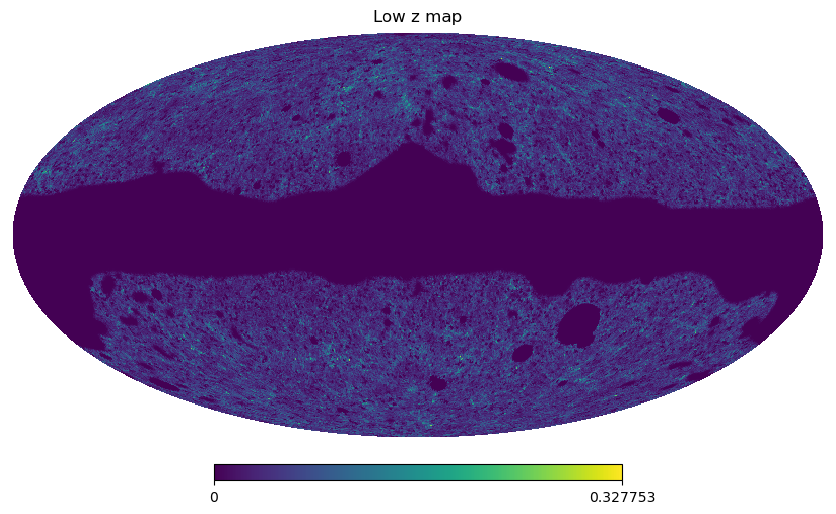

In [24]:
hp.mollview(map, title='Low z map')

In [20]:
# "D:\data_large\unwise_sz\unWISE_samples_0124\OneDrive_1_24-01-2025\unWISE_lowz_dndz.txt"

PATH_LOWZ_DNDZ = DAT + 'unWISE_samples_0124/OneDrive_1_24-01-2025/unWISE_lowz_dndz.txt'

dat_low = np.loadtxt(PATH_LOWZ_DNDZ, unpack=True)

PATH_MIDZ_DNDZ = DAT + 'unWISE_samples_0124/OneDrive_1_24-01-2025/unWISE_midz_dndz.txt'

dat_mid = np.loadtxt(PATH_MIDZ_DNDZ, unpack=True)

In [24]:
dndz_low = dat_low[:,1]
z_low = dat_low[:,0]

dndz_mid = dat_mid[:,1]
z_mid = dat_mid[:,0]

Text(0.5, 1.0, 'dN/dz')

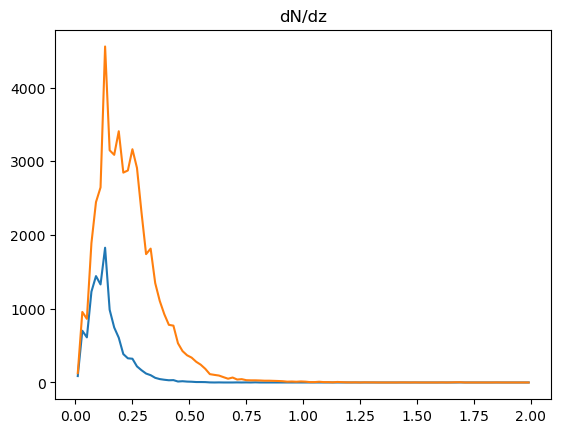

In [25]:
import matplotlib.pyplot as plt
plt.plot(z_low, dndz_low,label='lowz')
plt.plot(z_mid, dndz_mid,label='midz')
plt.title('dN/dz')

In [6]:
# "D:\data_large\unwise_sz\unWISE_samples_0124\OneDrive_1_24-01-2025\midz_fullsky_catalog_agglomerative_clustering_fix-pixell.fits\midz_fullsky_catalog_agglomerative_clustering_fix-pixell.fits"

PATH_LOW_CAR = DAT + 'unWISE_samples_0124/OneDrive_1_24-01-2025/lowz_fullsky_catalog_agglomerative_clustering_fix-pixell.fits/lowz_fullsky_catalog_agglomerative_clustering_fix-pixell.fits'

In [8]:
from astropy.io import fits

In [9]:
hdul = fits.open(PATH_LOW_CAR)

In [11]:
hdul.info()

Filename: /mnt/d/data_large/unwise_sz/unWISE_samples_0124/OneDrive_1_24-01-2025/lowz_fullsky_catalog_agglomerative_clustering_fix-pixell.fits/lowz_fullsky_catalog_agglomerative_clustering_fix-pixell.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (43200, 21601)   float64   


In [6]:
from pixell import enmap, utils, reproject, enplot

In [ ]:
enmap_data = enmap.read_map(PATH_LOW_CAR)

In [ ]:
plots = enplot.get_plots(enmap_data)
enplot.show(plots)